In [4]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import glob
from sklearn.neighbors import KNeighborsClassifier

In [7]:
path = './py_test/test_data/*.rtf'

fl_list = glob.glob(path)
fl_list

['./py_test/test_data\\Scan_30s_01_560.rtf',
 './py_test/test_data\\Scan_30s_700.rtf',
 './py_test/test_data\\Scan_30s_bg560.rtf',
 './py_test/test_data\\Scan_30s_oostserre.rtf']

In [32]:
d={}
for file in fl_list:
    fh = open(file, 'r')
    df=pd.DataFrame(columns=["MAC","signal"])
    for line in fh.readlines():
        word = line.split()[-1][:-1]
        if ':' in word:
            mac = word
        else:
            rssi = float(word)
            tempd = {"MAC": mac ,
                    "signal":rssi}
            df= df.append(tempd, ignore_index=True)
    d[ file.split('\\')[-1] ] = df

In [70]:
d['Scan_30s_oostserre.rtf']

,MAC,signal
0,00:a6:ca:66:ad:62,-69.0
1,84:3d:c6:b4:e3:bd,-84.0
2,84:3d:c6:b4:e3:b5,-80.0
3,00:a6:ca:44:70:7e,-71.0
4,84:3d:c6:b9:26:82,-81.0
5,00:a6:ca:44:71:a0,-76.0
6,84:3d:c6:c7:f1:e5,-75.0
7,00:a6:ca:44:70:72,-65.0
8,84:3d:c6:bd:41:1a,-64.0
9,00:a6:ca:61:f5:d5,-77.0


# read the arduino table


In [50]:
import json
import  urllib.request, json 

url_path = "https://services3.arcgis.com/jR9a3QtlDyTstZiO/ArcGIS/rest/services/Arduino_Table/FeatureServer/0/query?where=ObjectID%3E%3D0&outFields=MAC%2C+RSSI%2C+BSSID%2C+Room_ID+%2C+ObjectId+%2C+Time_Stamp+&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnDistinctValues=false&cacheHint=false&sqlFormat=none&f=pjson"

with urllib.request.urlopen(url_path) as url:
    data = json.loads(url.read().decode())


dict_keys(['objectIdFieldName', 'uniqueIdField', 'globalIdFieldName', 'fields', 'exceededTransferLimit', 'features'])

In [64]:
df_mega = pd.DataFrame(columns = ['MAC','RSSI','BSSID','Room_ID','ObjectId','Time_Stamp'])
import time
s = time.time()
for attr in data['features']:
    temp = (attr['attributes'])
    df_mega=df_mega.append( temp, ignore_index=True)
print(f"It took us {time.time()-s} sec")

It took us 97.70050287246704 sec


In [67]:
a = df_mega.MAC.unique()
df_mega['macno'] = df_mega.MAC.apply(lambda x: np.where(a==x)[0][0])

print(f"Max nof unique identifier is: {max(df_mega.macno)}")
df_mega

Max nof unique identifier is: 140


,MAC,RSSI,BSSID,Room_ID,ObjectId,Time_Stamp,macno
0,84:3d:c6:c7:ef:21,-69,TUvisitor,08.02.00.700,11097,1623246089,0
1,84:3d:c6:b9:3c:40,-69,eduroam,08.02.00.700,11098,1623246089,1
2,84:3d:c6:c7:ef:25,-70,Delft Free Wifi,08.02.00.700,11099,1623246089,2
3,84:3d:c6:c7:c3:e1,-70,tudelft-dastud,08.02.00.700,11100,1623246089,3
4,84:3d:c6:b9:3c:42,-71,Delft Free Wifi,08.02.00.700,11101,1623246089,4
...,...,...,...,...,...,...,...
9995,84:3d:c6:b9:2b:90,-66,eduroam,08.02.01.560,21092,1623252764,72
9996,00:3a:7d:12:45:22,-66,tudelft-dastud,08.02.01.560,21093,1623252764,91
9997,00:3a:7d:12:45:20,-66,eduroam,08.02.01.560,21094,1623252764,135
9998,00:3a:7d:12:45:25,-66,Delft Free Wifi,08.02.01.560,21095,1623252764,92


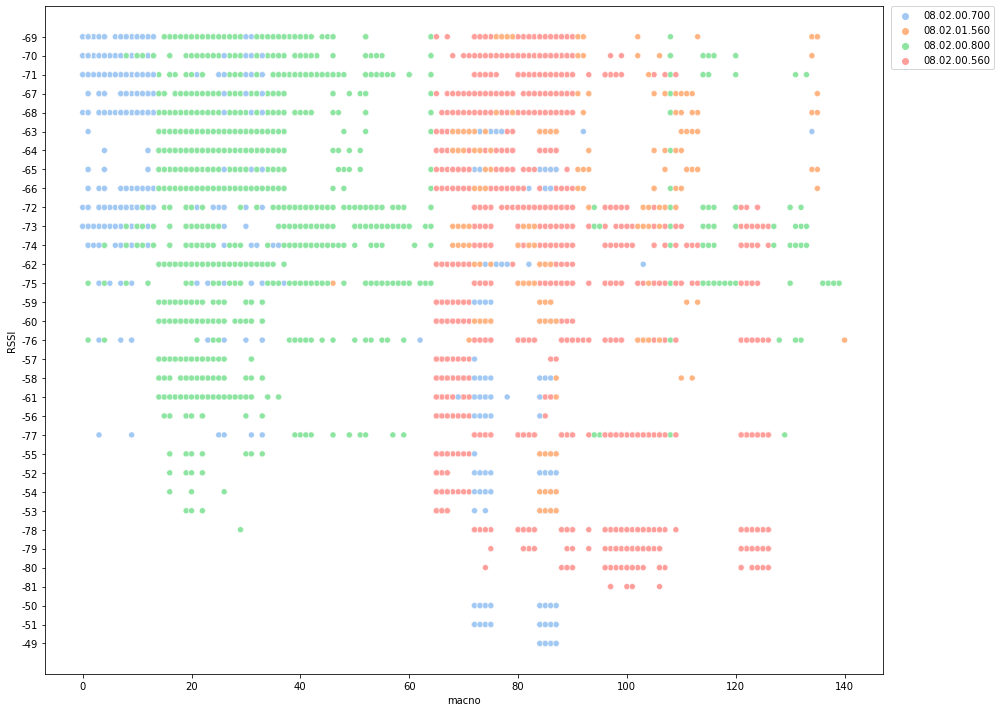

In [69]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,10))

sns.color_palette("pastel")
sns.scatterplot(data=df_mega, x="macno", y="RSSI", hue="Room_ID",  palette="pastel");

plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.tight_layout()

In [87]:
# ['Scan_30s_01_560.rtf', 'Scan_30s_700.rtf', 'Scan_30s_bg560.rtf', 'Scan_30s_oostserre.rtf']

file = 'Scan_30s_700.rtf'
test_df = d[file]

def indexer(a,x):
    ind = np.where(a==x)[0]
    if len(ind)!=0:
        return ind[0]

# training data /////////////////////////

x_train = df_mega[['macno' , 'RSSI']]
y_train = pd.Series(df_mega.Room_ID)
# print(x_train.head())

x_test = test_df[['signal' , 'MAC']].copy()
# y_test = pd.Series(test_df.place)
x_test['macno'] = x_test.MAC.apply(lambda x: indexer(a,x))
x_test.drop(['MAC'], axis=1, inplace=True)
x_test.reset_index(inplace=True, drop=True)
x_test.dropna(inplace=True)
x_test = x_test[['macno', 'signal']]
# train kNN model with training data ////////////////
knn = KNeighborsClassifier(n_neighbors = 7, weights='distance', algorithm='auto')
knn.fit(x_train , y_train)

# saving the trained model  
# f_name = './_data/training_data/knn_model.pkl'
# pickle.dump(knn, open(f_name, 'wb'))
# predicting using trained model
pred = knn.predict(x_test)

print(f"Predicted place is {stats.mode(pred)[0][0]}, actual room is {file}")

# print(f"Prediction done with a score of {knn.score(x_test, y_test[:x_test.shape[0]])}")

Predicted place is 08.02.00.800, actual room is Scan_30s_700.rtf
